# Day 2: Afternoon Lab 
## Phylogenetic Tree Construction
---

### 🎯 **Objective**

- In this lab, we'll learn how to construct phylogenetic trees from sequence data using Clustal Omega. 
- We'll be starting with multiple sequence alignment (MSA) and ending with phylogenetic visualization.

### ⚡ **Overview**

- **Sequence Retrieval**: Obtain sample sequences for alignment.
- **Multiple Sequence Alignment (MSA) & Phylogenetic Tree**: Use Clustal Omega [](https://www.ebi.ac.uk/jdispatcher/msa/clustalo).

**About Clustal Omega**  
Fast and accurate tool for aligning DNA, RNA, or protein sequences. Ideal for identifying conserved regions and evolutionary relationships.

**Key Algorithms**  
- **MSA**: Progressive alignment improved with Hidden Markov Models (HMMs) for higher accuracy and scalability.  
- **Phylogenetic Tree**: Neighbor-Joining (NJ) method based on pairwise distances from the alignment.

In [1]:
from IPython.display import clear_output
!pip install biopython
!pip install requests
clear_output()

###  🧬 **Sequences Retrieval with `Entrez`**

Choose sequences of interest from a public database. <br>
To save time, suppose we're interested in orthologous mRNA sequences of **antizyme inhibitor 1 (AZIN1)** gene from different species, retrieved from the NCBI Nucleotide database

- **Homo sapiens** (human), transcript variant 2  
  [NM_148174.4](https://www.ncbi.nlm.nih.gov/nuccore/NM_148174.4)

- **Pan troglodytes** (chimpanzee), transcript variant 2  
  [NM_001301719.1](https://www.ncbi.nlm.nih.gov/nuccore/NM_001301719.1)

- **Mus musculus** (house mouse), transcript variant 3  
  [NM_001301688.1](https://www.ncbi.nlm.nih.gov/nuccore/NM_001301688.1)

- **Bos taurus** (cattle)  
  [NM_001082611.2](https://www.ncbi.nlm.nih.gov/nuccore/NM_001082611.2)



In [2]:
# Import libraries
from Bio import Entrez
from Bio import SeqIO
import io

# ⚠️ Set your email for NCBI's Entrez (required for access)
Entrez.email = "your_email@example.com"  # replace with your email

def download_sequences(accessions):
    sequences = [] # To store the retrieved sequences
    for seq_id in accessions:
        try:
            # Use Entrez.efetch to get the sequence in FASTA format
            with Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text") as handle:
                fasta_data = handle.read()
                sequences.append(fasta_data)
                print(f"🧬 {seq_id} was retrieved sucessfully!")
        except Exception as e:
            print(f"❌ Error retrieving {seq_id}: {e}")
    return sequences

In [3]:
# Example accession numbers (sequences of interest)
accessions = ["NM_148174.4", "NM_001301719.1", "NM_001301688.1", "NM_001082611.2"]
sequences = download_sequences(accessions)

# Save retrieved sequences to a new FASTA file named sequences.fasta
with open("sequences.fasta", "w") as file:
    for seq in sequences:
        file.write(seq)
        
print("✅ Sequences retrieved and saved to sequences.fasta")


🧬 NM_148174.4 was retrieved sucessfully!
🧬 NM_001301719.1 was retrieved sucessfully!
🧬 NM_001301688.1 was retrieved sucessfully!
🧬 NM_001082611.2 was retrieved sucessfully!
✅ Sequences retrieved and saved to sequences.fasta


## 📌 Perform Multiple Sequence Alignment (MSA) & Phylogenetic Tree with Clustal Omega

⚠️ **Note**: This section is **entirely optional**. It demonstrates how to perform MSA and build a phylogenetic tree using an online web tool (cloud-based). Feel free to explore it for quick visualization, but in the next section, we'll use **Clustal Omega via CLI** (totally code-based) to achieve the same results (and more) programmatically using BioPython, which is the core skill to master.

Follow these steps to align your sequences and build a phylogenetic tree:

1. **Prepare your sequences**  
   Save the FASTA file (e.g., `sequences.fasta`) containing all selected sequences to your local folder.

2. **Access Clustal Omega**  
   Go to the Clustal Omega web server:  
   [https://www.ebi.ac.uk/jdispatcher/msa/clustalo](https://www.ebi.ac.uk/jdispatcher/msa/clustalo)

3. **Submit the job**  
   - Upload your `sequences.fasta` file.  
   - Select **DNA** as the sequence type.  
   - Leave other settings as default (Clustal Omega will automatically generate both MSA and a guide tree).  
   - Click **Submit**.

4. **View the Multiple Sequence Alignment**  
   Once complete, explore the alignment results.  

5. **View the Phylogenetic Tree**  
   Switch to the phylogenetic tree view (usually available as a separate tab or downloadable Newick file).  


## 📌 Perform Multiple Sequence Alignment (MSA) & Phylogenetic Tree with BioPython

In this part, we will use BioPython to construct a phylogenetic tree from the downloaded sequences and visualize it.

### **Step 1️⃣: Parse and Align the Sequences**

We'll first read the sequences from the FASTA file and perform a multiple sequence alignment. We’ll use Clustal Omega for multipe sequence alignment

In [4]:
from IPython.display import clear_output
!apt-get install clustalo # Install Clustal Omega in the Colan environment
clear_output()

In [ ]:
import subprocess

input_fasta = "sequences.fasta"              # Input: multi-fasta file we created earlier
output_alignment = "aligned_sequences.aln"   # Output: alignment file in 'Clustal' format

# Build Clustal Omega command
cmd = [
    "clustalo",
    "-i", input_fasta,       # Input file 
    "-o", output_alignment,  # Output file
    "--auto",                # Automatically set options based on sequences
    "--outfmt=clustal",      # Traditional alignment format 
    "-v"                     # Verbose mode (shows progress)
]

print(f"⌛ Running Clustal Omega alignment on {input_fasta}...")
result = subprocess.run(cmd, capture_output=True, text=True)

#
if result.returncode == 0:
    print("✅ Alignment completed successfully!")
    
    # Preview results
    print("\n---| Alignment Preview |---")
    with open(output_alignment, "r") as f:
        # Show the first 5 lines to see the header and the first block of alignment
        for _ in range(5):
            print(f.readline().strip())
else:
    print("❌ Error during alignment:")
    print(result.stderr)


⌛ Running Clustal Omega alignment on sequences.fasta...
✅ Alignment completed successfully!

---| Alignment Preview |---
CLUSTAL O(1.2.4) multiple sequence alignment


NM_148174.4         ------------------------------ACACTTTCAGGCTCTGATCGCGGCCGCAGT
NM_001301719.1      AAATACTGGCGTCGCTGGCGCCGCCTTCTCACACTTTCAGGCTCTGATCGCGGCCGCAGT


### **Step 2️⃣: Phylogenetic Tree Construction**

A **phylogenetic tree** is a branching diagram showing evolutionary relationships among species or sequences. We use Biopython's `Bio.Phylo` to visualize ancestry from alignment data.

**1. Distance Matrix**
Calculate pairwise differences using a **DistanceCalculator** (identity model):  
- `0.0` → identical sequences  
- Higher values → greater divergence

**2. Tree Building Methods**

Phylogenetic tree building methods infer evolutionary relationships from sequence alignments by calculating distances (or other metrics) between taxa and then clustering them into a tree structure.

Two common distance-based methods are **Neighbor-Joining (NJ)** and **UPGMA**.
| Method    | Key Assumption                  | Strengths / Notes                          |
|-----------|---------------------------------|--------------------------------------------|
| **NJ**    | No constant rate assumption     | <span style="color:lime">Robust & widely used<br>→ Handles rate variation well</span> |
| **UPGMA** | Constant molecular clock (equal evolution rates) | <span style="color:lime">Simple & fast</span><br><span style="color:red">→ Often inaccurate in real data</span> |

**3. Interpreting the Tree**
- **Leaves (taxa)**: Your input sequences (e.g., accession IDs)  
- **Internal nodes**: Inferred common ancestors  
- **Branch lengths**: Amount of evolutionary change (genetic distance)

#### ➡️ `NJ` Method
🎯 **Objective**: Observe the following code to generate a **Phylogenetic Tree** using the `NJ` method.

✅ Alignment loaded successfully.
✅ Phylogenetic tree constructed.


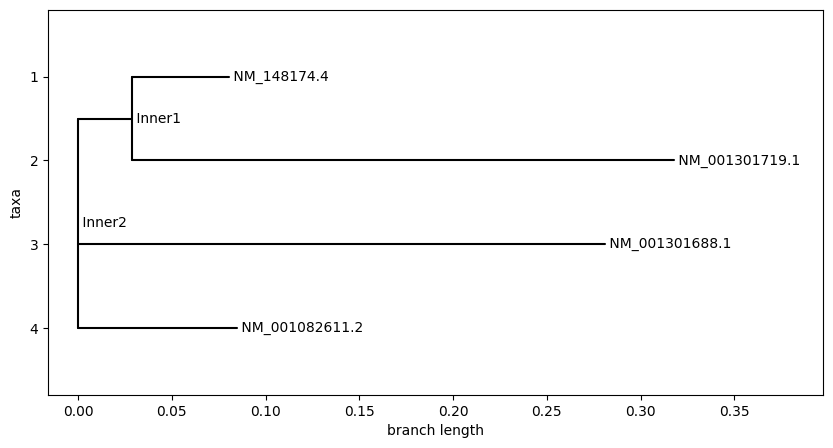

In [ ]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

try:
    # Load the alignment file
    alignment = AlignIO.read("aligned_sequences.aln", "clustal")
    print("✅ Alignment loaded successfully.")
    
    # Calculate the Distance Matrix
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment) # The less the closer
    
    # Construct the Tree
    # 'nj' stands for Neighbor-Joining
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    tree.rooted = True
    print("✅ Phylogenetic tree constructed.")
    
    # Visualize the tree using Matplotlib
    fig = plt.figure(figsize=(10, 5), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes)
    
except FileNotFoundError:
    print("❌ Error: 'aligned_sequences.aln' not found. Did you run the Clustal cell?")
except Exception as e:
    print(f"❌ An error occurred: {e}")

### ➡️ `UPGMA` Method

🔸 **Task**: Complete the following code to generate a **Phylogenetic Tree** using the `UPGMA` method.

✅ Alignment loaded successfully.


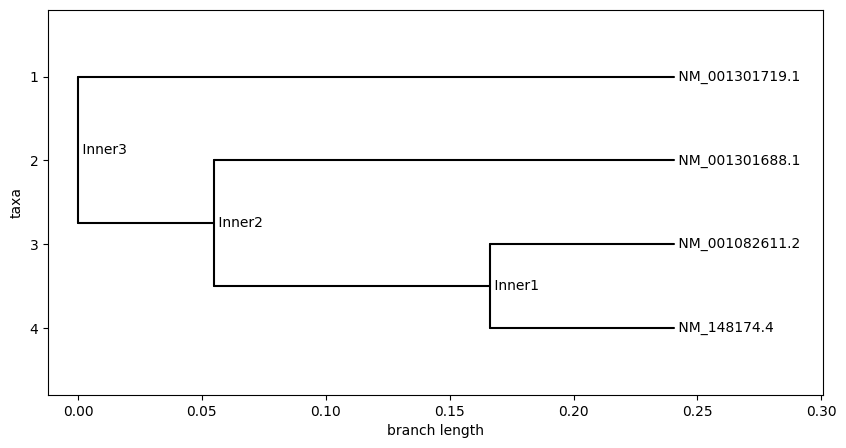

In [ ]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

try:
    # Load the alignment file
    # 🔸 Continue your code here
    
    print("✅ Alignment loaded successfully.")
    
    # Calculate the Distance Matrix
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment) # The less the closer
    
    # Construct the Tree
    # 💡 Hint: 'upgma' stands for Unweighted Pair Group Method with Arithmetic Mean.
    # 🔸 Continue your code here

    
    # Visualize the tree using Matplotlib
    fig = plt.figure(figsize=(10, 5), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes)
    
except FileNotFoundError:
    print("❌ Error: 'aligned_sequences.aln' not found. Did you run the Clustal cell?")
except Exception as e:
    print(f"❌ An error occurred: {e}")

<details>

<summary><font color="Orange">Click here to reveal the answer</font></summary>

```python
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

try:
    # Load the alignment file
    alignment = AlignIO.read("aligned_sequences.aln", "clustal")
    print("✅ Alignment loaded successfully.")
    
    # Calculate the Distance Matrix
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment) # The less the closer
    
    # Construct the Tree
    # 💡 Hint: 'upgma' stands for Unweighted Pair Group Method with Arithmetic Mean.
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm)
    tree.rooted = True
    
    # Visualize the tree using Matplotlib
    fig = plt.figure(figsize=(10, 5), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes)
    
except FileNotFoundError:
    print("❌ Error: 'aligned_sequences.aln' not found. Did you run the Clustal cell?")
except Exception as e:
    print(f"❌ An error occurred: {e}")

```
</details>

### **Step 3️⃣: Key Insights**

#### **👉🏻 Key Insight A**: Limitations of UPGMA
In a UPGMA tree, all leaves (sequence tips) align perfectly on the right side.  
This looks neat, but it's often **biologically unrealistic**, it assumes every sequence evolved at **exactly the same rate** (a strict molecular clock).

#### **👉🏻 Key Insight B**: Biological Reality of NJ
Neighbor-Joining trees show unequal branch lengths:  
- **Longer branches**: More mutations accumulated → sequence is highly divergent.  
- **Shorter branches**: Fewer changes → sequence evolved slowly or is very similar to its ancestor.

#### **👉🏻 Key Insight C**: Which Method to Use?
For most real bioinformatics work, **Neighbor-Joining (NJ)** is preferred.  
It is more flexible and does **not** assume constant evolution rates across lineages.  
UPGMA is mainly taught as a simple introduction to clustering concepts.


#### Contributed by: Ahmed Bahaj

- [LinkedIn Profile](https://www.linkedin.com/in/ahmed-bahaj-6330031b8/)